In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c976caf428fe7a6b84a4d5134cac5bc


In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kapaa
Processing Record 2 of Set 13 | henties bay
Processing Record 3 of Set 13 | tiksi
Processing Record 4 of Set 13 | airai
Processing Record 5 of Set 13 | hervey bay
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | oswego
Processing Record 8 of Set 13 | nikolskoye
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | bredasdorp
Processing Record 11 of Set 13 | puerto ayora
Processing Record 12 of Set 13 | agadez
Processing Record 13 of Set 13 | garowe
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | vardo
Processing Record 16 of Set 13 | conakry
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | cape town
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | marrakesh
Processing Record 21 of Set 13 | astana
Processing Record 22 of Set 13 | yellowknife
Processing Record 23 of Se

Processing Record 36 of Set 16 | yar
Processing Record 37 of Set 16 | kloulklubed
Processing Record 38 of Set 16 | vila franca do campo
Processing Record 39 of Set 16 | kruisfontein
Processing Record 40 of Set 16 | acapulco
Processing Record 41 of Set 16 | provideniya
Processing Record 42 of Set 16 | haines junction
Processing Record 43 of Set 16 | hakodate
Processing Record 44 of Set 16 | saleaula
City not found. Skipping...
Processing Record 45 of Set 16 | ilulissat
Processing Record 46 of Set 16 | tapaua
City not found. Skipping...
Processing Record 47 of Set 16 | narsaq
Processing Record 48 of Set 16 | dunkwa
Processing Record 49 of Set 16 | tokur
Processing Record 50 of Set 16 | srednekolymsk
Processing Record 1 of Set 17 | oktyabrskoye
Processing Record 2 of Set 17 | faya
Processing Record 3 of Set 17 | saint-leu
Processing Record 4 of Set 17 | chardara
Processing Record 5 of Set 17 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 17 | cairns
Processing Record

Processing Record 20 of Set 20 | san angelo
Processing Record 21 of Set 20 | noshiro
Processing Record 22 of Set 20 | obsharovka
Processing Record 23 of Set 20 | ust-ilimsk
Processing Record 24 of Set 20 | urengoy
Processing Record 25 of Set 20 | ulety
Processing Record 26 of Set 20 | sao francisco
Processing Record 27 of Set 20 | katsiveli
City not found. Skipping...
Processing Record 28 of Set 20 | concepcion
Processing Record 29 of Set 20 | huangzhou
Processing Record 30 of Set 20 | gondanglegi
Processing Record 31 of Set 20 | champerico
Processing Record 32 of Set 20 | kabwe
Processing Record 33 of Set 20 | port macquarie
Processing Record 34 of Set 20 | phatthalung
Processing Record 35 of Set 20 | aizpute
Processing Record 36 of Set 20 | pangnirtung
Processing Record 37 of Set 20 | dingle
Processing Record 38 of Set 20 | ahipara
Processing Record 39 of Set 20 | villa rica
Processing Record 40 of Set 20 | itapirapua
Processing Record 41 of Set 20 | kismayo
Processing Record 42 of S

Processing Record 4 of Set 24 | cookeville
Processing Record 5 of Set 24 | galiwinku
City not found. Skipping...
Processing Record 6 of Set 24 | jaisalmer
Processing Record 7 of Set 24 | shimoda
Processing Record 8 of Set 24 | lerwick
Processing Record 9 of Set 24 | odweyne
Processing Record 10 of Set 24 | batagay-alyta
Processing Record 11 of Set 24 | inuvik
Processing Record 12 of Set 24 | ust-kuyga
Processing Record 13 of Set 24 | toktogul
Processing Record 14 of Set 24 | vieques
Processing Record 15 of Set 24 | jarjis
City not found. Skipping...
Processing Record 16 of Set 24 | gandajika
Processing Record 17 of Set 24 | luderitz
Processing Record 18 of Set 24 | saint-georges
Processing Record 19 of Set 24 | basco
Processing Record 20 of Set 24 | ondjiva
Processing Record 21 of Set 24 | pacific grove
Processing Record 22 of Set 24 | santa vitoria do palmar
Processing Record 23 of Set 24 | say
Processing Record 24 of Set 24 | aswan
Processing Record 25 of Set 24 | evans
Processing Re

In [51]:
len(city_data)

553

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,69.80,73,90,6.91,US,2021-04-18 16:01:18
1,Henties Bay,-22.1160,14.2845,85.24,36,96,14.72,NA,2021-04-18 16:01:18
2,Tiksi,71.6872,128.8694,6.48,89,100,12.55,RU,2021-04-18 16:01:19
3,Airai,-8.9266,125.4092,56.93,81,75,2.71,TL,2021-04-18 16:01:19
4,Hervey Bay,-25.2986,152.8535,64.00,85,0,4.00,AU,2021-04-18 16:01:19
5,Rikitea,-23.1203,-134.9692,76.75,74,1,6.62,PF,2021-04-18 16:01:20
6,Oswego,43.4501,-76.1497,55.40,54,1,13.80,US,2021-04-18 16:01:20
7,Nikolskoye,59.7035,30.7861,55.40,30,0,15.66,RU,2021-04-18 16:01:20
8,Busselton,-33.6500,115.3333,54.00,91,11,8.81,AU,2021-04-18 16:01:21
9,Bredasdorp,-34.5322,20.0403,80.60,17,8,12.66,ZA,2021-04-18 16:01:21


In [57]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-04-18 16:01:18,22.0752,-159.3190,69.80,73,90,6.91
1,Henties Bay,NA,2021-04-18 16:01:18,-22.1160,14.2845,85.24,36,96,14.72
2,Tiksi,RU,2021-04-18 16:01:19,71.6872,128.8694,6.48,89,100,12.55
3,Airai,TL,2021-04-18 16:01:19,-8.9266,125.4092,56.93,81,75,2.71
4,Hervey Bay,AU,2021-04-18 16:01:19,-25.2986,152.8535,64.00,85,0,4.00
5,Rikitea,PF,2021-04-18 16:01:20,-23.1203,-134.9692,76.75,74,1,6.62
6,Oswego,US,2021-04-18 16:01:20,43.4501,-76.1497,55.40,54,1,13.80
7,Nikolskoye,RU,2021-04-18 16:01:20,59.7035,30.7861,55.40,30,0,15.66
8,Busselton,AU,2021-04-18 16:01:21,-33.6500,115.3333,54.00,91,11,8.81
9,Bredasdorp,ZA,2021-04-18 16:01:21,-34.5322,20.0403,80.60,17,8,12.66


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

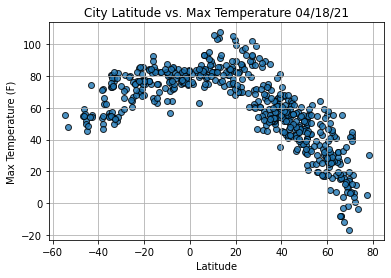

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

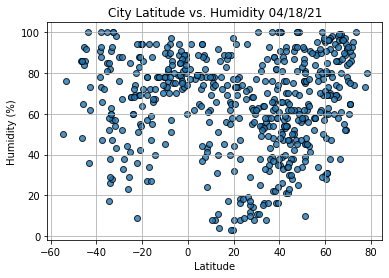

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

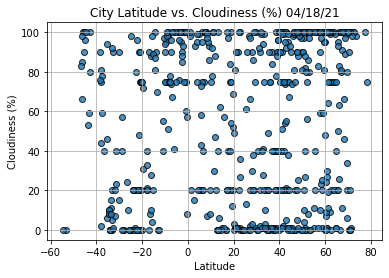

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

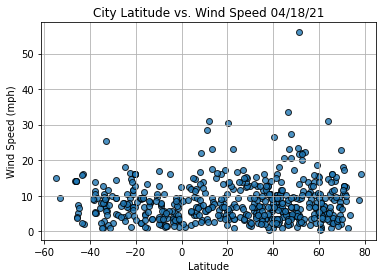

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()